In [1]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [2]:
import numpy as np
import pandas as pd

In [3]:
import datetime as dt

# Reflect Tables into SQLAlchemy ORM

In [4]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func

In [5]:
engine = create_engine("sqlite:///Resources/hawaii.sqlite")

In [6]:
# reflect an existing database into a new model
Base = automap_base()
# reflect the tables
Base.prepare(engine, reflect=True)

In [7]:
# We can view all of the classes that automap found
Base.classes.keys()

['measurement', 'station']

In [8]:
# Save references to each table
Measurement = Base.classes.measurement
Station = Base.classes.station

In [9]:
# Create our session (link) from Python to the DB
session = Session(engine)

# Exploratory Climate Analysis

Text(0.5, 0, 'date')

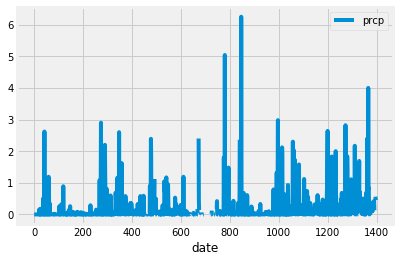

In [32]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results
PrecipDate = session.query(Measurement.date, Measurement.prcp).filter(Measurement.date >= "2016-8-23").all()
#PrecipDate
# Calculate the date 1 year ago from the last data point in the database

# Perform a query to retrieve the data and precipitation scores

# Save the query results as a Pandas DataFrame and set the index to the date column
PrcpDf = pd.DataFrame(PrecipDate)
PrcpDf
# Sort the dataframe by date
PrcpDf.set_index(PrcpDf.date)
# Use Pandas Plotting with Matplotlib to plot the data
PrcpDf.plot()
plt.xlabel("date")

![precipitation](Images/precipitation.png)

In [33]:
# Use Pandas to calcualte the summary statistics for the precipitation data
PrcpDf.describe()

,prcp
count,1267.000000
mean,0.165927
std,0.453913
min,0.000000
25%,0.000000
50%,0.000000
75%,0.105000
max,6.250000


![describe](Images/describe.png)

In [44]:
# Design a query to show how many stations are available in this dataset?
#Station.__table__.columns.keys()
StationQuery = session.query(Station.station).count()
StationQuery

['id', 'station', 'name', 'latitude', 'longitude', 'elevation']

In [63]:
# What are the most active stations? (i.e. what stations have the most rows)?
Measurement.__table__.columns.keys()
MeasurementQuery = session.query(Measurement.station, func.count(Measurement.station)).group_by(Measurement.station).order_by((Measurement.station).desc()).all()
MeasurementQuery
# List the stations and the counts in descending order.


[('USC00519523', 2669),
 ('USC00519397', 2724),
 ('USC00519281', 2772),
 ('USC00518838', 511),
 ('USC00517948', 1372),
 ('USC00516128', 2612),
 ('USC00514830', 2202),
 ('USC00513117', 2709),
 ('USC00511918', 1979)]

In [67]:
# Using the station id from the previous query, calculate the lowest temperature recorded, 
# highest temperature recorded, and average temperature most active station?
MeasurementQuery2 = session.query(func.min(Measurement.tobs), func.max(Measurement.tobs), func.avg(Measurement.tobs)).filter(Measurement.station == "USC00519523").all()
MeasurementQuery2

[(56.0, 85.0, 74.5436493068565)]

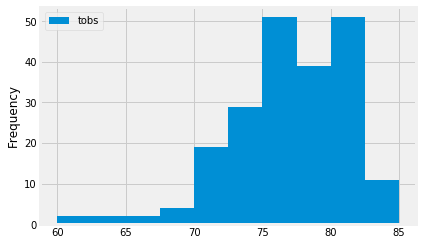

In [73]:
# Choose the station with the highest number of temperature observations.
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram
MostActive = session.query(Measurement.tobs).filter(Measurement.date >= "2016-8-23").filter(Measurement.station == "USC00519523").all()
MostActive
MADf= pd.DataFrame(MostActive)
MADf.plot.hist()

![precipitation](Images/station-histogram.png)

In [16]:
# This function called `calc_temps` will accept start date and end date in the format '%Y-%m-%d' 
# and return the minimum, average, and maximum temperatures for that range of dates
def calc_temps(start_date, end_date):
    """TMIN, TAVG, and TMAX for a list of dates.
    
    Args:
        start_date (string): A date string in the format %Y-%m-%d
        end_date (string): A date string in the format %Y-%m-%d
        
    Returns:
        TMIN, TAVE, and TMAX
    """
    
    return session.query(func.min(Measurement.tobs), func.avg(Measurement.tobs), func.max(Measurement.tobs)).\
        filter(Measurement.date >= start_date).filter(Measurement.date <= end_date).all()

# function usage example
print(calc_temps('2012-02-28', '2012-03-05'))

[(62.0, 69.57142857142857, 74.0)]


In [100]:
# Use your previous function `calc_temps` to calculate the tmin, tavg, and tmax 
# for your trip using the previous year's data for those same dates.
Tmin, Tmax, Tave = calc_temps("2016-08-23", "2016-08-30")[0]
Tmin

71.0

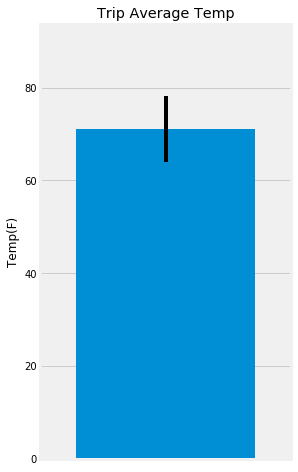

In [106]:
# Plot the results from your previous query as a bar chart. 
# Use "Trip Avg Temp" as your Title
# Use the average temperature for the y value
# Use the peak-to-peak (tmax-tmin) value as the y error bar (yerr)

#plt.bar(1, Tmin, width =0.5, yerr=(Tmax-Tmin))
fig, ax = plt.subplots(figsize=plt.figaspect(2.))
ax.bar(1, Tmin, width =0.5, yerr=Tmax-Tmin)
ax.set(xticks = range(1), title = "Trip Average Temp", ylabel = "Temp(F)")
ax.margins(.2,.2)